In [ ]:
#We'll use matrix decomposition from linear algebra to do some image processing


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import misc

In [2]:
img = misc.face()
# img = cv2.imread('face.png')


C:\Users\Student\AppData\Local\Temp\ipykernel_43880\1513486666.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


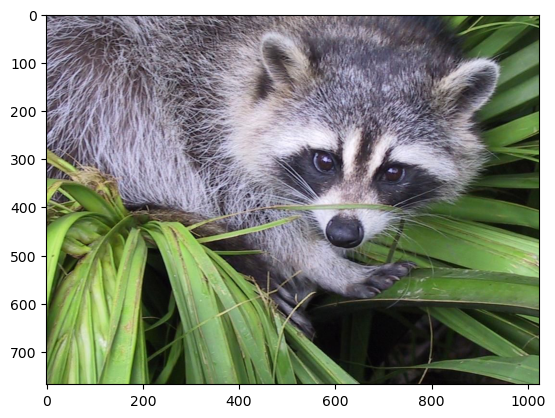

In [3]:
# show the image
plt.imshow(img)

In [4]:
# get the shape, axis and array properties
print(img.shape)
print(type(img))
print(img.ndim)

(768, 1024, 3)
<class 'numpy.ndarray'>
3


In [5]:
# the three dimensions represent the red green blue color channels of the image
img[:,:,0] # red channel


array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

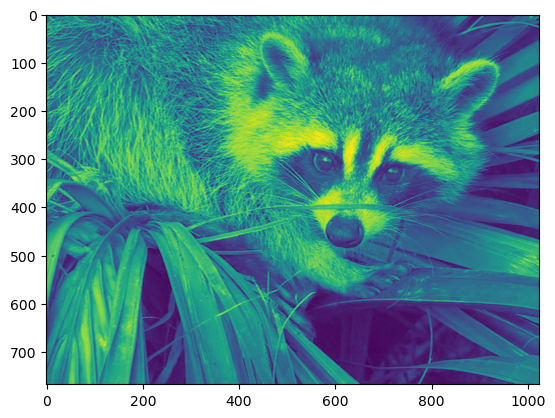

In [6]:
plt.imshow(img[:,:,0])

In [7]:
print(img.max(), img.min()) # max and min values in the image

255 0


In [8]:
# let's convert the values into floats for better linear algebra operations
# Normalizing...
img_array = img/255

In [9]:
print(img_array.max(), img_array.min(), img_array.dtype)

1.0 0.0 float64


In [60]:
# assign each color to a seperate matrix using array slicing

red_channel = img_array[:,:,0]
green_channel = img_array[:,:,1]
blue_channel = img_array[:,:,2]

In [48]:
# from linear algebra, it's possible to approximate existing sets of data
# we'll use the SVF (Singular Value decomposition)
#SVD returns 3 matrices which can be multiplied to a given matrix A
# U.S.V_transpose = A
#U and V are square, and S is same size as A
# S is a diagonal matrix and contains the singular values of A
# The values on the diagonal are always non-negative 
# and is an indicator of the importance of some features in A


In [12]:
# According to colorimetry you can obtain a grayscale image
# of a color image using the following formula
# Y = 0.2126R + 0.7152G + 0.0722B

img_gray = img_array @ [0.2126, 0.7152, 0.0722]
# img_gray=np.matmul(img_array,[0.2126, 0.7152, 0.0722])

In [13]:
img_gray.shape

(768, 1024)

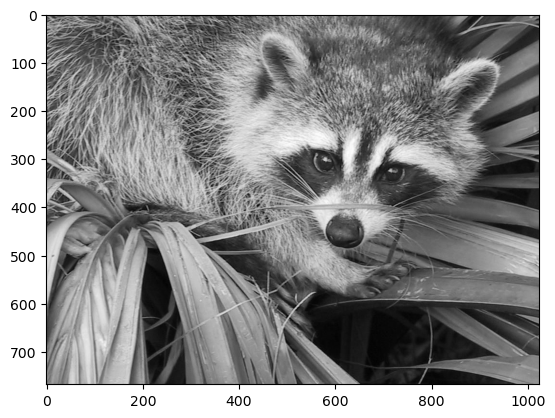

In [14]:
plt.imshow(img_gray, cmap='gray')

In [15]:
# applying the SVD to obtain the decomposition
U,s,Vt = np.linalg.svd(img_gray)

In [16]:
# let's confirm the shapes of the matrices
print(U.shape, s.shape, Vt.shape)

(768, 768) (768,) (1024, 1024)


In [17]:
# peculiar shape of s is for space saving. Let's reconstruct the original matrix
Sigma = np.zeros((768,1024))
for i in range(768):
    Sigma[i,i] = s[i] # values are only in the diagonal


In [19]:
s

array([4.10420982e+02, 8.55609020e+01, 6.36106671e+01, 4.58511469e+01,
       4.19688416e+01, 3.82587510e+01, 3.16594158e+01, 2.72263754e+01,
       2.65206164e+01, 2.61081536e+01, 2.34248772e+01, 2.14991620e+01,
       1.78565287e+01, 1.73794164e+01, 1.68657446e+01, 1.62673541e+01,
       1.54869480e+01, 1.48781507e+01, 1.41150066e+01, 1.39655963e+01,
       1.37073230e+01, 1.27556978e+01, 1.21290791e+01, 1.19790923e+01,
       1.13891928e+01, 1.12349166e+01, 1.10337400e+01, 1.07047262e+01,
       1.03885693e+01, 1.02474881e+01, 9.93466602e+00, 9.78380642e+00,
       9.52319207e+00, 9.46867094e+00, 9.22328278e+00, 9.10297048e+00,
       8.95857583e+00, 8.78599990e+00, 8.64968194e+00, 8.45321936e+00,
       8.33282792e+00, 8.08989579e+00, 7.99441445e+00, 7.83759126e+00,
       7.73050469e+00, 7.70670454e+00, 7.62237733e+00, 7.60629699e+00,
       7.45443441e+00, 7.40911836e+00, 7.31288823e+00, 7.26806263e+00,
       7.04799057e+00, 7.00823355e+00, 6.97870185e+00, 6.87447019e+00,
      

In [18]:
Sigma

array([[410.42098224,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  85.56090199,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  63.61066707, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [20]:
# how close is the reconstructed U . Sigm . Vt to original grayscale image?
# we can do check this using the norm of the difference

# print(np.linalg.norm(img_gray - U @ Sigma @ Vt))
print(np.linalg.norm(img_gray - np.matmul(np.matmul( U , Sigma) , Vt)))

1.3610579319035828e-12


Text(0.5, 1.0, 'SVD')

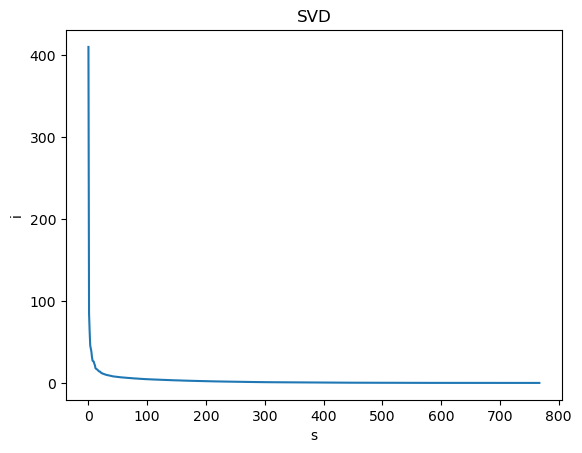

In [21]:
# Let's see which singular values are important in building an approximation for our image
plt.plot(s)
plt.xlabel('s')
plt.ylabel('i')
plt.title('SVD')

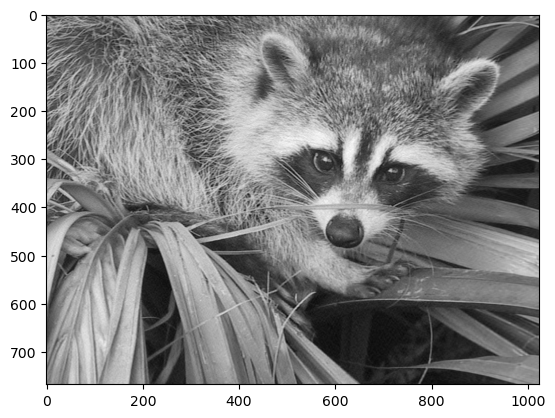

In [27]:
# the idea is to consider all but the first k singuular values in Sigma as 0 and keep U and Vt intact
# e.g k = 10

k = 200
approx = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(approx, cmap = 'gray')

In [81]:
Sigma[:,:k].shape

(768, 10)

In [31]:
from datetime import datetime, date, time, timedelta
import dateutil
import random
import numpy as np
import time

In [9]:
# let's create our own database

# read first names from text file
with open('first_names.txt', 'r') as f:
    first_names = f.readlines()

# read last names from text file
with open('last_names.txt', 'r') as f:
    last_names = f.readlines()

number_of_users = 1000

# title last name

last_names = [x.title().strip() for x in last_names]
first_names = [x.title().strip() for x in first_names]



In [10]:
# did it work?
last_names[0]

'Smith'

In [11]:
# generate some names
users = []

for _ in range(number_of_users):
    users.append(random.choice(first_names) + ' ' + random.choice(last_names))

print(users[0], users[-1])

Fionnuala Tietjen Ludivina Severi


In [21]:
# create a random date range
start_date = date(1950,1,1)
end_date = date(2023,4,6)
date_array = np.arange(start_date,end_date)

# let's get random date of births for our fictional users
DOBs = []
for _ in range(number_of_users):
    DOBs.append(random.choice(date_array.astype(datetime))) # sample from the date array and convert to datetime from numpy date64
# DOB_2 = random.sample(list(date_array), number_of_users)

In [24]:
# let's save users to file

with open ('user_database.txt', 'w') as F:
    for dob, name in zip(DOBs, users):
        to_write = f"{name},{dob}\n"
        F.write(to_write)

In [17]:
# testing something
dt = DOBs[0].astype(datetime)
dt.year


2018

In [13]:
len(date_array)

26758

In [25]:
# get user details
def get_user_details():
    name = input("Name: ")
    dob = input("DOB: mm/dd/yyyy")
    return name, dateutil.parser.parse(dob)

In [28]:
for i in range (2):
    name,dob = get_user_details()
    to_write =  f"{name},{dob}\n"
    # convert from datetime to date
    dob = dob.date
    with open ('user_database.txt', 'a') as F:
        F.write(to_write)

In [26]:
# convert from datetime to a timestamp
# find the difference between times
datetime.timestamp(b)
b - datetime.now()

datetime.timedelta(days=5, seconds=48447, microseconds=440425)

In [107]:
#convert numpy datetime64 to datetime
date_array[0].astype(datetime).year

1950

In [ ]:
# find users that are over 18 years old
adult_users = []
for name, dob in zip (users, DOBs):
    # are they over 18?
    now = datetime.timestamp(datetime.now())
    dob = datetime.timestamp(dob)
    diff = now - dob

    # is difference > 18 

    # add user to adult users
    

In [33]:
time.mktime(DOBs[0].time_tuple())

AttributeError: 'datetime.date' object has no attribute 'time_tuple'